# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | akom ii
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | celestun
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | senador jose porfirio
Processing Record 7 of Set 1 | kabalo
Processing Record 8 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 9 of Set 1 | vilyuysk
Processing Record 10 of Set 1 | lata
Processing Record 11 of Set 1 | bouillargues
Processing Record 12 of Set 1 | gualaceo
Processing Record 13 of Set 1 | nova sintra
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | comodoro rivadavia
Processing Record 16 of Set 1 | luderitz
Processing Record 17 of Set 1 | kerikeri
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | hariana
Processing Record 21 of Set 1 | port mathurin

Processing Record 37 of Set 4 | hithadhoo
Processing Record 38 of Set 4 | mazamari
Processing Record 39 of Set 4 | vila velha
Processing Record 40 of Set 4 | aldama
Processing Record 41 of Set 4 | paradip garh
Processing Record 42 of Set 4 | zaysan
Processing Record 43 of Set 4 | mil'kovo
Processing Record 44 of Set 4 | pitangui
Processing Record 45 of Set 4 | carloforte
Processing Record 46 of Set 4 | codrington
Processing Record 47 of Set 4 | la ronge
Processing Record 48 of Set 4 | koryazhma
Processing Record 49 of Set 4 | kudahuvadhoo
Processing Record 0 of Set 5 | emerald
Processing Record 1 of Set 5 | whitburn
Processing Record 2 of Set 5 | ribeira grande
Processing Record 3 of Set 5 | lompoc
Processing Record 4 of Set 5 | santiago de cao
Processing Record 5 of Set 5 | baglung
Processing Record 6 of Set 5 | kenai
Processing Record 7 of Set 5 | mahibadhoo
Processing Record 8 of Set 5 | priargunsk
Processing Record 9 of Set 5 | shasta lake
Processing Record 10 of Set 5 | port alfre

Processing Record 35 of Set 8 | lobito
Processing Record 36 of Set 8 | lamballe
Processing Record 37 of Set 8 | olgii
City not found. Skipping...
Processing Record 38 of Set 8 | fisterra
Processing Record 39 of Set 8 | we
City not found. Skipping...
Processing Record 40 of Set 8 | east london
Processing Record 41 of Set 8 | new norfolk
Processing Record 42 of Set 8 | yamada
Processing Record 43 of Set 8 | rafsanjan
Processing Record 44 of Set 8 | guarapari
Processing Record 45 of Set 8 | tangalle
Processing Record 46 of Set 8 | punta arenas
Processing Record 47 of Set 8 | isfara
Processing Record 48 of Set 8 | camocim
Processing Record 49 of Set 8 | masterton
Processing Record 0 of Set 9 | santa eularia des riu
Processing Record 1 of Set 9 | la'ie
Processing Record 2 of Set 9 | obidos
Processing Record 3 of Set 9 | stephenville
Processing Record 4 of Set 9 | geraldton
Processing Record 5 of Set 9 | spring creek
Processing Record 6 of Set 9 | merritt
Processing Record 7 of Set 9 | port 

Processing Record 24 of Set 12 | stung treng
Processing Record 25 of Set 12 | san julian
Processing Record 26 of Set 12 | karratha
Processing Record 27 of Set 12 | bonthe
Processing Record 28 of Set 12 | cole harbour
Processing Record 29 of Set 12 | arraial do cabo
Processing Record 30 of Set 12 | yicheng
Processing Record 31 of Set 12 | pisco
Processing Record 32 of Set 12 | vallenar
Processing Record 33 of Set 12 | yuzhno-kurilsk
Processing Record 34 of Set 12 | tsetserleg
Processing Record 35 of Set 12 | north bend
Processing Record 36 of Set 12 | dawson creek
Processing Record 37 of Set 12 | tecuala
Processing Record 38 of Set 12 | calvi
Processing Record 39 of Set 12 | ierapetra
Processing Record 40 of Set 12 | fada
Processing Record 41 of Set 12 | taoudenni
Processing Record 42 of Set 12 | fish town
Processing Record 43 of Set 12 | yinchuan
Processing Record 44 of Set 12 | bengbu
Processing Record 45 of Set 12 | taco pozo
-----------------------------
Data Retrieval Complete     

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,0.42,84,60,6.77,GS,1701114046
1,akom ii,2.7833,10.5667,21.80,99,100,0.86,CM,1701114046
2,blackmans bay,-43.0167,147.3167,11.07,87,98,1.55,AU,1701114046
3,celestun,20.8667,-90.4000,26.62,81,100,7.32,MX,1701114046
4,albany,42.6001,-73.9662,6.99,56,27,1.34,US,1701114046


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,0.42,84,60,6.77,GS,1701114046
1,akom ii,2.7833,10.5667,21.80,99,100,0.86,CM,1701114046
2,blackmans bay,-43.0167,147.3167,11.07,87,98,1.55,AU,1701114046
3,celestun,20.8667,-90.4000,26.62,81,100,7.32,MX,1701114046
4,albany,42.6001,-73.9662,6.99,56,27,1.34,US,1701114046


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

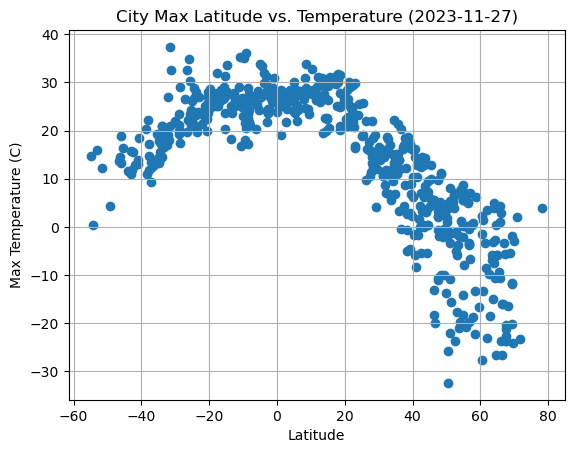

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
endRunDate = city_data_df["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')
plt.title(f"City Max Latitude vs. Temperature ({runDate})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

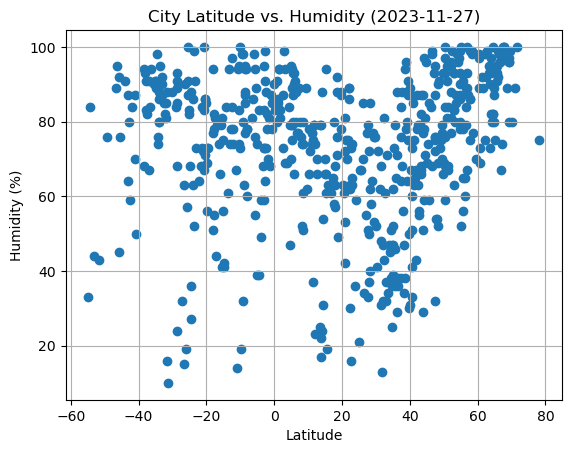

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({runDate})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

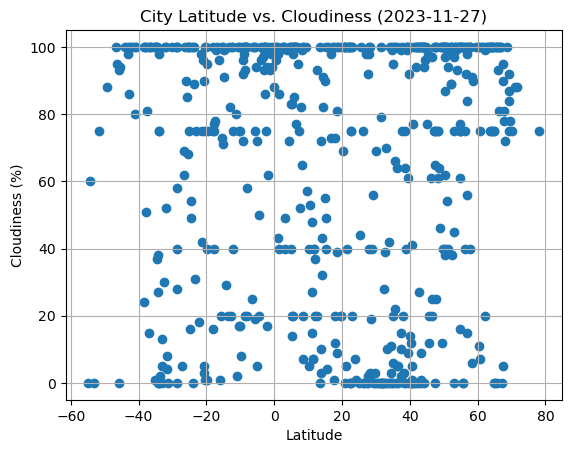

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({runDate})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

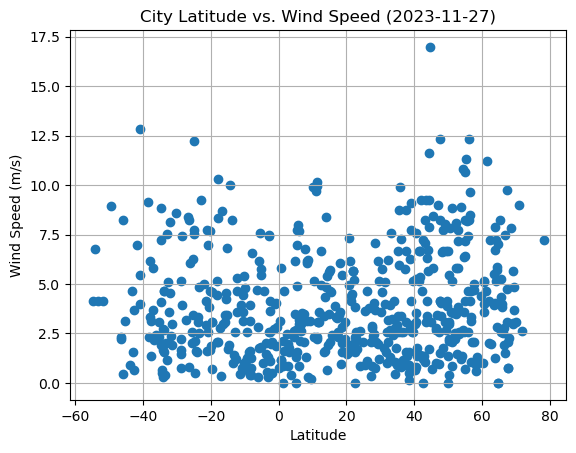

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({runDate})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, y_label, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue**2}")
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,akom ii,2.7833,10.5667,21.80,99,100,0.86,CM,1701114046
3,celestun,20.8667,-90.4000,26.62,81,100,7.32,MX,1701114046
4,albany,42.6001,-73.9662,6.99,56,27,1.34,US,1701114046
7,vilyuysk,63.7553,121.6247,-15.00,90,100,4.02,RU,1701114046
8,lata,40.1629,-8.3327,16.01,89,100,0.65,PT,1701114046


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,0.42,84,60,6.77,GS,1701114046
2,blackmans bay,-43.0167,147.3167,11.07,87,98,1.55,AU,1701114046
5,senador jose porfirio,-2.5908,-51.9542,29.00,64,86,2.57,BR,1701114046
6,kabalo,-6.0500,26.9167,20.22,98,100,0.28,CD,1701114046
10,gualaceo,-2.9000,-78.7833,21.81,83,99,2.58,EC,1701114046


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.74438881225003


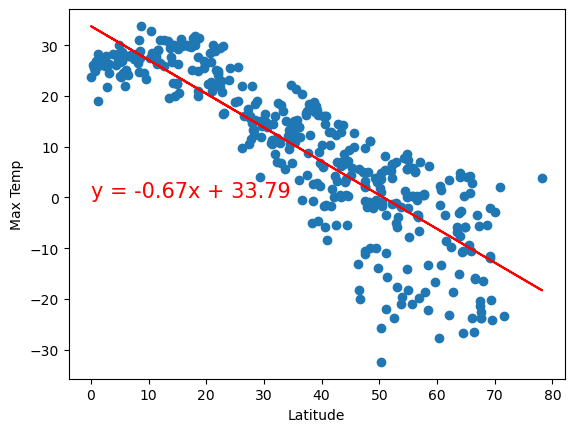

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
y_label = "Max Temp"
plot_linear_regression(x_values, y_values, y_label, (0,0))
plt.show()

The r-squared is: 0.48982408729516397


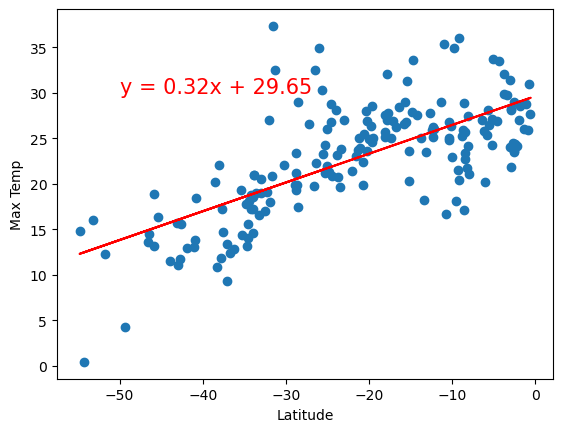

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
y_label = "Max Temp"
plot_linear_regression(x_values, y_values, y_label, (-50,30))
plt.show()

**Discussion about the linear relationship:** 
There is a fairly strong negative correlation between temperature and latitude with a correlation coefficient of 0.74438881225003 on Northern Hemisphere.

There is a fairly strong positive correlation between temperature and latitude with a correlation coefficient of 0.48982408729516397 on Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.07948573282278452


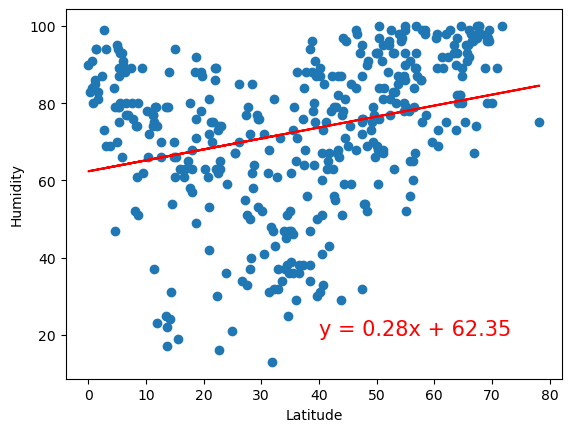

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
y_label = "Humidity"
plot_linear_regression(x_values, y_values, y_label, (40,20))
plt.show()

The r-squared is: 5.725119066763145e-05


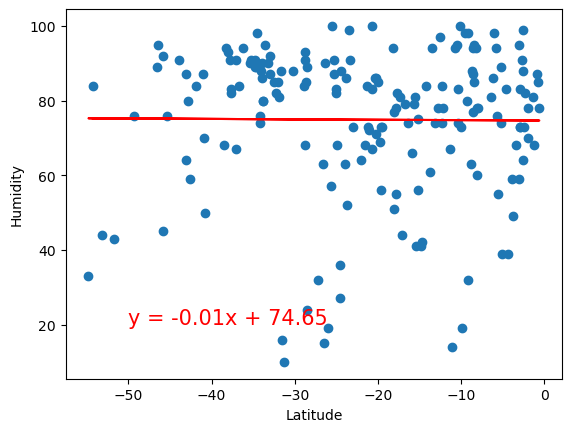

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
y_label = "Humidity"
plot_linear_regression(x_values, y_values, y_label, (-50,20))
plt.show()

**Discussion about the linear relationship:** 
There is a relatively weak positive correlation between humidity and latitude with a correlation coefficient of 0.07948573282278452 on Northern Hemisphere.

There is a almost no correlation correlation between humidity and latitude with a correlation coefficient of 5.725119066763145e-05 on Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.015675634151954405


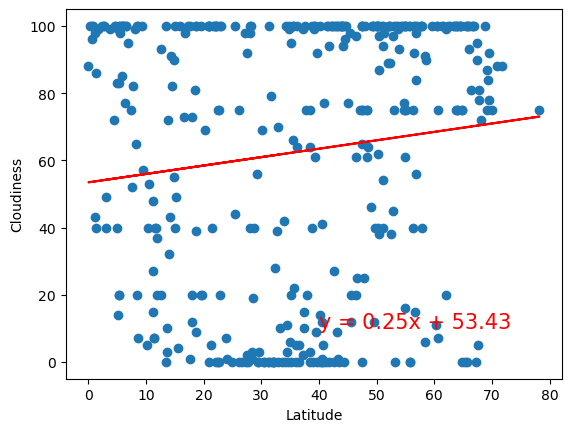

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
y_label = "Cloudiness"
plot_linear_regression(x_values, y_values, y_label, (40,10))
plt.show()

The r-squared is: 0.0171528818348182


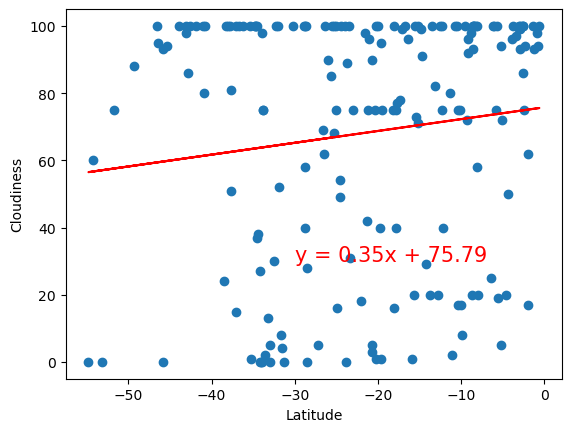

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
y_label = "Cloudiness"
plot_linear_regression(x_values, y_values, y_label, (-30,30))
plt.show()

**Discussion about the linear relationship:** 
There is a relatively weak positive correlation between cloudiness and latitude with a correlation coefficient of 0.015675634151954405 on Northern Hemisphere.

There is a relatively weak positive correlation between cloudiness and latitude with a correlation coefficient of 0.0171528818348182 on Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.03308446617542909


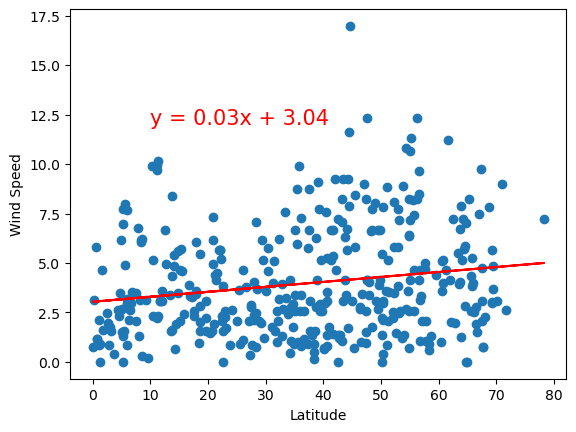

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
y_label = "Wind Speed"
plot_linear_regression(x_values, y_values, y_label, (10,12))
plt.show()

The r-squared is: 0.030722369562589245


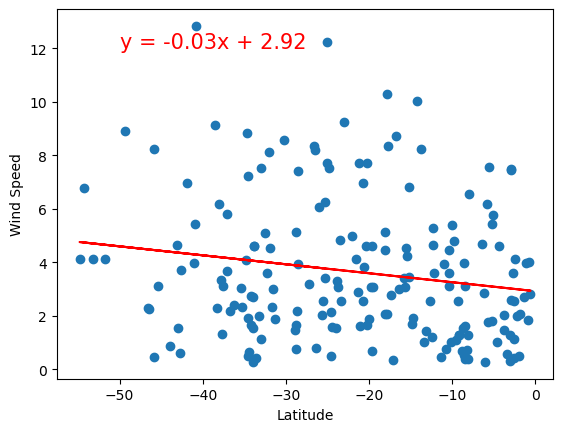

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
y_label = "Wind Speed"
plot_linear_regression(x_values, y_values, y_label, (-50,12))
plt.show()

**Discussion about the linear relationship:** 
There is a weak positive correlation correlation between wind speed and latitude with a correlation coefficient of 0.03308446617542909 on Northern Hemisphere.

There is a weak negative correlation between wind speed and latitude with a correlation coefficient of 0.030722369562589245 on Southern Hemisphere.